In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
import sys
sys.path.append("..")
import train_test_split as split
import classification_tree as tree
iris = load_iris()
X, y = iris.data, iris.target
tree_iris = tree.ClassificationTree()

X_train, X_test, y_train, y_test = split.train_test_split(X, y, seed=2108)
print("Training set size: ", X_train.shape[0])
print("Test set size: ", X_test.shape[0])

Training set size:  113
Test set size:  37


In [14]:
tree_iris.fit(X_train, y_train)
tree_iris.print_tree(feature_names = iris.feature_names)
depth = tree_iris.get_depth()
print("Depth :", depth)

petal length (cm) <= 3.0
Left:
|   --> Class: 0.0
Right:
|   petal length (cm) <= 5.0
|   Left:
|   |   petal width (cm) <= 1.7
|   |   Left:
|   |   |   --> Class: 1.0
|   |   Right:
|   |   |   sepal width (cm) <= 3.2
|   |   |   Left:
|   |   |   |   --> Class: 2.0
|   |   |   Right:
|   |   |   |   --> Class: 1.0
|   Right:
|   |   sepal length (cm) <= 6.1
|   |   Left:
|   |   |   sepal length (cm) <= 6.0
|   |   |   Left:
|   |   |   |   --> Class: 2.0
|   |   |   Right:
|   |   |   |   sepal width (cm) <= 2.7
|   |   |   |   Left:
|   |   |   |   |   --> Class: 2.0
|   |   |   |   Right:
|   |   |   |   |   --> Class: 1.0
|   |   Right:
|   |   |   --> Class: 2.0
Depth : 5


In [15]:
predictions = tree_iris.predict(X_test)
accuracy = np.mean(predictions == y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.972972972972973


Max Depth: 1, Actual Depth: 1 Accuracy: 0.5945945945945946
Max Depth: 2, Actual Depth: 2 Accuracy: 0.918918918918919
Max Depth: 3, Actual Depth: 3 Accuracy: 0.972972972972973
Max Depth: 4, Actual Depth: 4 Accuracy: 0.972972972972973
Max Depth: 5, Actual Depth: 5 Accuracy: 0.972972972972973
Max Depth: 6, Actual Depth: 5 Accuracy: 0.972972972972973
Max Depth: 7, Actual Depth: 5 Accuracy: 0.972972972972973
Max Depth: 8, Actual Depth: 5 Accuracy: 0.972972972972973
Max Depth: 9, Actual Depth: 5 Accuracy: 0.972972972972973
Max Depth: 10, Actual Depth: 5 Accuracy: 0.972972972972973


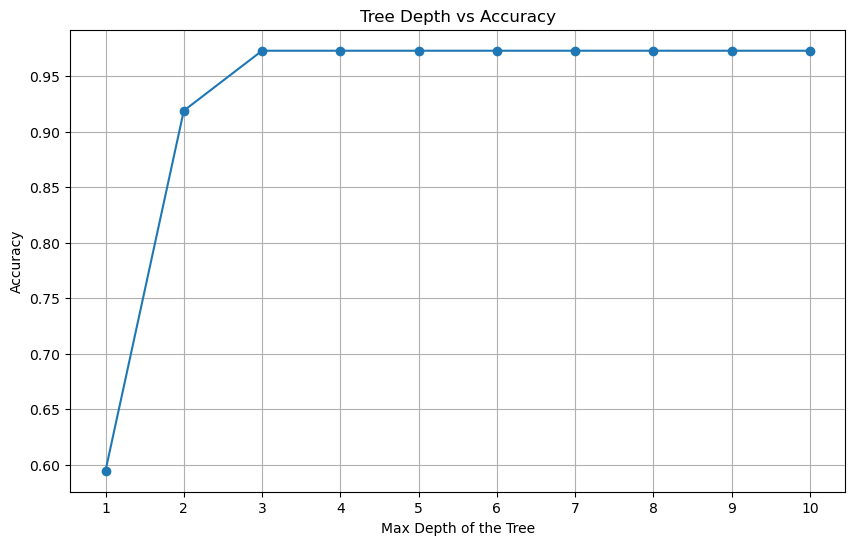

In [16]:
import matplotlib.pyplot as plt

# List to store the accuracies
accuracies = []

# Loop over the range of depths
for depth in range(1, 11):
    tree_depth_test = tree.ClassificationTree(max_depth=depth, min_size=1)
    tree_depth_test.fit(X_train, y_train)
    predictions = tree_depth_test.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)
    print(f"Max Depth: {depth}, Actual Depth: {tree_depth_test.get_depth()} Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Tree Depth vs Accuracy')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()